In [3]:
import json

import tensorflow.keras.layers as L
import tensorflow as tf
from sklearn.model_selection import train_test_split
import utility_fct
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout, ReLU, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from keras.utils import plot_model


import numpy as np # manipulate N-dimensional arrays
import pandas as pd # data frame
import matplotlib.pyplot as plt # data plotting
import seaborn # advanced data plotting

import tensorflow as tf

In [4]:
tf.__version__
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
train = pd.read_json("train.json",lines=True)

In [6]:
pred_cols = ['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C', 'deg_pH10', 'deg_50C']

In [7]:
def MCRMSE(y_true, y_pred):
    colwise_mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=1)
    return tf.reduce_mean(tf.sqrt(colwise_mse), axis=1)
def RMSE(y_true, y_pred):
    colwise_rmse = tf.reduce_mean(tf.square(y_true - y_pred), axis=1)
    return colwise_rmse

In [8]:
test_org = pd.read_json('test.json',lines=True)
test = pd.read_csv('test_final.csv')

In [9]:
test_sub = utility_fct.expend_feature_test(test_org)

In [10]:
train_seq = pd.read_csv('train_sequenced.csv')

In [11]:
seq = train_seq
seq.head(5)

,id,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C,count_gr,N,C,G,U,E,H,I,M,S,X,),.,N_E,N_H,N_I,N_M,N_S,N_X,N_B
0,id_001f94081,0.1359,0.2613,0.2631,0.1501,0.2167,0.3297,0.7556,2.3375,0.3581,0.6382,1,5,0,1,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0
1,id_001f94081,0.2070,0.3842,0.2860,0.2750,0.3475,1.5693,2.9830,3.5060,2.9683,3.4773,1,5,0,1,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0
2,id_001f94081,0.1633,0.1372,0.0964,0.0947,0.1880,1.1227,0.2526,0.3008,0.2589,0.9988,1,5,0,0,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0
3,id_001f94081,0.1452,0.2531,0.1574,0.1866,0.2124,0.8686,1.3789,1.0108,1.4552,1.3228,1,5,0,0,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0
4,id_001f94081,0.1314,0.1798,0.1000,0.1369,0.1703,0.7217,0.6376,0.2635,0.7244,0.7877,1,5,0,0,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0


In [12]:
from keras.backend import clear_session
clear_session()

In [13]:
def mcrmse(y_true, y_pred):
        cmse = tf.reduce_mean(tf.square(y_true - y_pred), axis=1)
        res = float(tf.reduce_mean(tf.sqrt(cmse)))
        return res

In [14]:
y = seq.loc[:,["reactivity","deg_Mg_pH10","deg_pH10","deg_Mg_50C","deg_50C"]]
X = seq.loc[:,['C', 'G', 'U','E', 'H', 'I', 'M', 'S', 'X', ')', '.']]
X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.2, random_state=1,shuffle=False)

In [15]:
X_sub = test.loc[:,['C', 'G', 'U','E', 'H', 'I', 'M', 'S', 'X', ')', '.']]

In [16]:
opt = Adam(lr=0.001)

In [17]:
train.columns

Index(['index', 'id', 'sequence', 'structure', 'predicted_loop_type',
       'signal_to_noise', 'SN_filter', 'seq_length', 'seq_scored',
       'reactivity_error', 'deg_error_Mg_pH10', 'deg_error_pH10',
       'deg_error_Mg_50C', 'deg_error_50C', 'reactivity', 'deg_Mg_pH10',
       'deg_pH10', 'deg_Mg_50C', 'deg_50C'],
      dtype='object')

In [18]:
features_2 = [ 'C', 'G', 'U','E', 'H', 'I', 'M', 'S', 'X', ')', 
             '.', 'N_E', 'N_H', 'N_I', 'N_M','N_S', 'N_X', 'N_B']

X_2 = seq.loc[:, features_2]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=1,shuffle=False)
X_sub_2 = test.loc[:,features_2]

In [19]:
X_2

,C,G,U,E,H,I,M,S,X,),.,N_E,N_H,N_I,N_M,N_S,N_X,N_B
0,0,1,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108047,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0
108048,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0
108049,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0
108050,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0


In [20]:
clear_session()
shape = X_2.shape[1]

In [22]:
  model = Sequential()
  model.add(Dense(1000,input_shape = [shape])) 
  model.add(ReLU())
  model.add(Dropout(0.3))
  model.add(Dense(500))
  model.add(ReLU())
  model.add(Dropout(0.3))
  model.add(Dense(150))
  model.add(ReLU())
  model.add(Dropout(0.3))
  model.add(Dense(100))
  model.add(ReLU())
  model.add(Dropout(0.3))
  model.add(Dense(50))
  model.add(ReLU())
  model.add(Dropout(0.3))
  model.add(Dense(y.shape[1]))
  print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              19000     
_________________________________________________________________
re_lu_5 (ReLU)               (None, 1000)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               500500    
_________________________________________________________________
re_lu_6 (ReLU)               (None, 500)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 150)              

In [23]:
model.compile(loss=RMSE,
              optimizer=opt)

In [24]:
batch_size = 200
epochs = 100
hist_MLP = model.fit(X_train_2, y_train_2,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.3)

Epoch 1/100
303/303 [==============================] - 4s 4ms/step - loss: 0.3221 - val_loss: 0.1663
Epoch 2/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1817 - val_loss: 0.1688
Epoch 3/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1734 - val_loss: 0.1644
Epoch 4/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1740 - val_loss: 0.1625
Epoch 5/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1758 - val_loss: 0.1636
Epoch 6/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1705 - val_loss: 0.1631
Epoch 7/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1724 - val_loss: 0.1622
Epoch 8/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1707 - val_loss: 0.1618
Epoch 9/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1665 - val_loss: 0.1620
Epoch 10/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1691 - val_lo

In [25]:
y_sub = model.predict(test.loc[:, features_2])
y_pred_dlp = pd.DataFrame(y_sub, columns= ['reactivity', 
            'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C', 'deg_50C'])

y_pred_dlp.insert(0, "id_seqpos", test_sub['id'], True) 

In [26]:
y_pred_dlp

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,1.169566,1.563394,2.545525,1.422755,1.380409
1,id_00073f8be_1,1.169566,1.563394,2.545525,1.422755,1.380409
2,id_00073f8be_2,0.916781,0.808980,0.838319,0.946365,0.887732
3,id_00073f8be_3,0.916781,0.808980,0.838319,0.946365,0.887732
4,id_00073f8be_4,0.916781,0.808980,0.838319,0.946365,0.887732
...,...,...,...,...,...,...
457948,id_ffda94f24_125,0.767437,0.725796,0.732596,0.801653,0.769310
457949,id_ffda94f24_126,0.364950,0.531038,0.673675,0.546134,0.568884
457950,id_ffda94f24_127,0.767437,0.725796,0.732596,0.801653,0.769310
457951,id_ffda94f24_128,0.767437,0.725796,0.732596,0.801653,0.769310


In [27]:
y_pred_dlp.to_csv('mlp_rmse.csv', index=False)


In [28]:
shape = X_2.shape[1]

In [32]:
  model_2 = Sequential()
  model_2.add(Dense(1000,input_shape = [shape])) 
  model_2.add(ReLU())
  model_2.add(Dropout(0.3))
  model_2.add(Dense(500))
  model_2.add(ReLU())
  model_2.add(Dropout(0.4))
  model_2.add(Dense(150))
  model_2.add(ReLU())
  model_2.add(Dropout(0.4))
  model_2.add(Dense(100))
  model_2.add(ReLU())
  model_2.add(Dropout(0.3))
  model_2.add(Dense(50))
  model_2.add(ReLU())
  model_2.add(Dropout(0.3))
  model_2.add(Dense(y.shape[1]))
  print(model_2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1000)              19000     
_________________________________________________________________
re_lu_15 (ReLU)              (None, 1000)              0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 500)               500500    
_________________________________________________________________
re_lu_16 (ReLU)              (None, 500)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 150)              

In [33]:
model_2.compile(loss=mcrmse,
              optimizer=opt)

In [34]:
batch_size = 200
epochs = 100
hist_MLP_2 = model_2.fit(X_train_2, y_train_2,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.3)

Epoch 1/100
303/303 [==============================] - 2s 4ms/step - loss: 0.3600 - val_loss: 0.2905
Epoch 2/100
303/303 [==============================] - 1s 3ms/step - loss: 0.2979 - val_loss: 0.2881
Epoch 3/100
303/303 [==============================] - 1s 3ms/step - loss: 0.2953 - val_loss: 0.2877
Epoch 4/100
303/303 [==============================] - 1s 3ms/step - loss: 0.2928 - val_loss: 0.2891
Epoch 5/100
303/303 [==============================] - 1s 3ms/step - loss: 0.2940 - val_loss: 0.2877
Epoch 6/100
303/303 [==============================] - 1s 3ms/step - loss: 0.2915 - val_loss: 0.2870
Epoch 7/100
303/303 [==============================] - 1s 3ms/step - loss: 0.2903 - val_loss: 0.2867
Epoch 8/100
303/303 [==============================] - 1s 3ms/step - loss: 0.2920 - val_loss: 0.2879
Epoch 9/100
303/303 [==============================] - 1s 3ms/step - loss: 0.2919 - val_loss: 0.2863
Epoch 10/100
303/303 [==============================] - 1s 3ms/step - loss: 0.2896 - val_lo

In [35]:
y_sub_2 = model_2.predict(test.loc[:, features_2])
y_pred_MLP_loss2 = pd.DataFrame(y_sub_2, columns= ['reactivity', 
            'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C', 'deg_50C'])

y_pred_MLP_loss2.insert(0, "id_seqpos", test_sub['id'], True) 

In [36]:
y_pred_MLP_loss2.head()

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.839449,1.064060,2.173461,0.986400,1.066287
1,id_00073f8be_1,0.839449,1.064060,2.173461,0.986400,1.066287
2,id_00073f8be_2,0.849374,0.625993,0.780258,0.809573,0.834401
3,id_00073f8be_3,0.849374,0.625993,0.780258,0.809573,0.834401
4,id_00073f8be_4,0.849374,0.625993,0.780258,0.809573,0.834401


In [37]:
y_pred_MLP_loss2.to_csv('mlp_mcrmse.csv', index=False)


In [38]:
def evaluate(model, test_features, test_y):
    predictions = model.predict(test_features)
    mcrmsc = utility_fct.mcrmsc_yannick(test_y, predictions)[0]
    print('MCRMSC: {:0.4f}.'.format(mcrmsc))
    
    return mcrmsc

In [40]:
model_3 = Sequential()
model_3.add(Dense(1000,input_shape = [shape]))
model_3.add(ReLU())
model_3.add(Dropout(0.3))
model_3.add(Dense(500))
model_3.add(ReLU())
model_3.add(Dropout(0.3))
model_3.add(Dense(150))
model_3.add(ReLU())
model_3.add(Dropout(0.3))
model_3.add(Dense(100))
model_3.add(ReLU())
model_3.add(Dropout(0.3))
model_3.add(Dense(50))
model_3.add(ReLU())
model_3.add(Dropout(0.3))
model_3.add(Dense(y.shape[1]))
print(model_3.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1000)              19000     
_________________________________________________________________
re_lu_24 (ReLU)              (None, 1000)              0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 500)               500500    
_________________________________________________________________
re_lu_25 (ReLU)              (None, 500)               0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 150)              

In [41]:
model_3.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=opt)

In [42]:
batch_size = 200
epochs = 100
hist_MLP_3 = model_3.fit(X_train_2, y_train_2,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.3)

Epoch 1/100
303/303 [==============================] - 2s 4ms/step - loss: 0.3176 - val_loss: 0.1698
Epoch 2/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1798 - val_loss: 0.1762
Epoch 3/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1750 - val_loss: 0.1747
Epoch 4/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1757 - val_loss: 0.1637
Epoch 5/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1761 - val_loss: 0.1665
Epoch 6/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1692 - val_loss: 0.1663
Epoch 7/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1685 - val_loss: 0.1646
Epoch 8/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1715 - val_loss: 0.1651
Epoch 9/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1713 - val_loss: 0.1678
Epoch 10/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1694 - val_lo

In [43]:
y_sub_3 = model_3.predict(test.loc[:, features_2])
y_pred_MLP_loss3 = pd.DataFrame(y_sub_3, columns= ['reactivity', 
            'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C', 'deg_50C'])

y_pred_MLP_loss3.insert(0, "id_seqpos", test_sub['id'], True) 

In [44]:
y_pred_MLP_loss2.to_csv('mlp_mse.csv', index=False)

In [49]:
loss_mse = evaluate(model_3, X_test_2, y_test_2)
loss_mcrmse = evaluate(model_2, X_test_2, y_test_2)
loss_rmse = evaluate(model, X_test_2, y_test_2)

MCRMSC: 0.3965.
MCRMSC: 0.4143.
MCRMSC: 0.3964.


In [50]:
print('test set loss with rmse =', loss_rmse)
print('test set loss with mse =', loss_mse)
print('test set loss with mcrmse =', loss_mcrmse)

test set loss with rmse = 0.39637896791241234
test set loss with mse = 0.39647887688243383
test set loss with mcrmse = 0.4143455696733275


We can see there are not much differnce between rmse and mse loss on the test data set. But while with uplod, compare to public test dataset. rmse has a much better score, 2%. Which means MSE and MCRMSE are prone to over fit the train data set and RMSE is much better than the other two in terme of choice of loss. 

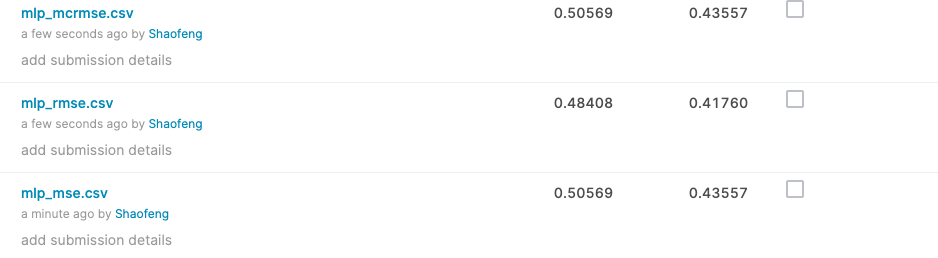

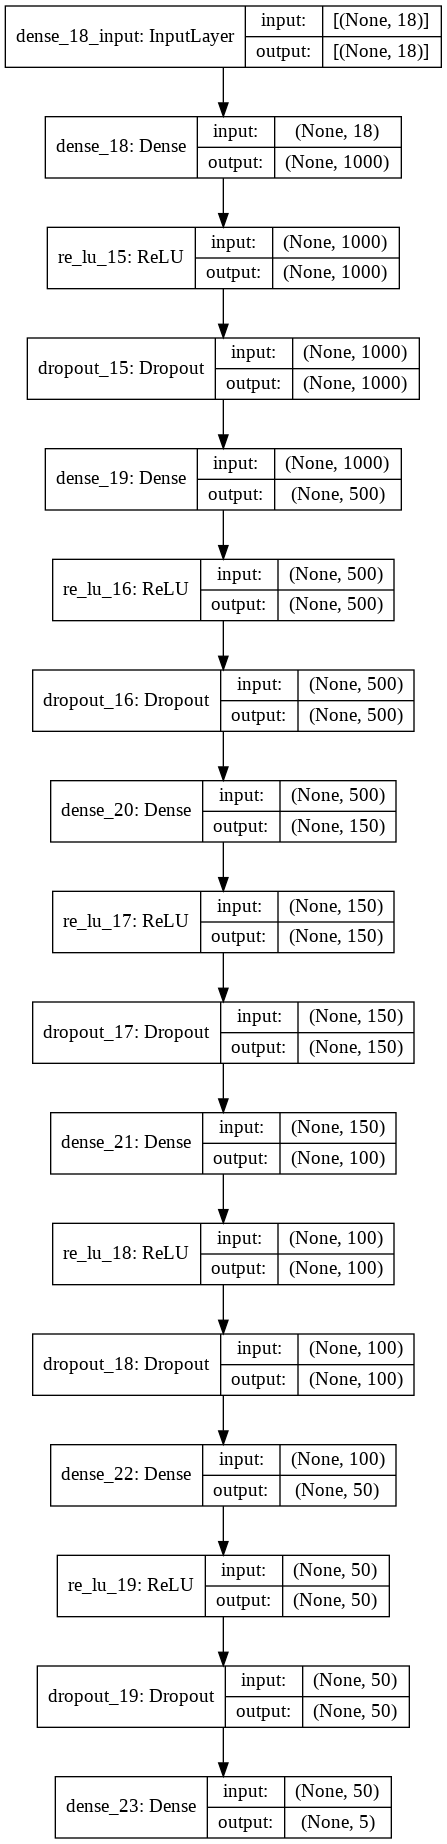

In [46]:
plot_model(model_2,show_shapes=True)
